In [5]:
import os
import pandas as pd
from sqlalchemy import create_engine

db_user = 'chevalier'
db_host = 'localhost'
db_port = '5432'
db_name = 'postgres'

engine = create_engine(f'postgresql://{db_user}@{db_host}:{db_port}/{db_name}')


In [6]:
csv_folder_path = 'sql project'

for filename in os.listdir(csv_folder_path):
    if filename.endswith('.csv'):
        csv_file_path = os.path.join(csv_folder_path, filename)
        df = pd.read_csv(csv_file_path)

        table_name = filename.replace('.csv', '')

        df.to_sql(table_name, engine, if_exists='replace', index=False)

        print(f"Uploaded {filename} to table {table_name} in PostgreSQL")

Uploaded olist_sellers_dataset.csv to table olist_sellers_dataset in PostgreSQL
Uploaded product_category_name_translation.csv to table product_category_name_translation in PostgreSQL
Uploaded olist_orders_dataset.csv to table olist_orders_dataset in PostgreSQL
Uploaded olist_order_items_dataset.csv to table olist_order_items_dataset in PostgreSQL
Uploaded olist_customers_dataset.csv to table olist_customers_dataset in PostgreSQL
Uploaded olist_geolocation_dataset.csv to table olist_geolocation_dataset in PostgreSQL
Uploaded olist_order_payments_dataset.csv to table olist_order_payments_dataset in PostgreSQL
Uploaded olist_order_reviews_dataset.csv to table olist_order_reviews_dataset in PostgreSQL
Uploaded olist_products_dataset.csv to table olist_products_dataset in PostgreSQL


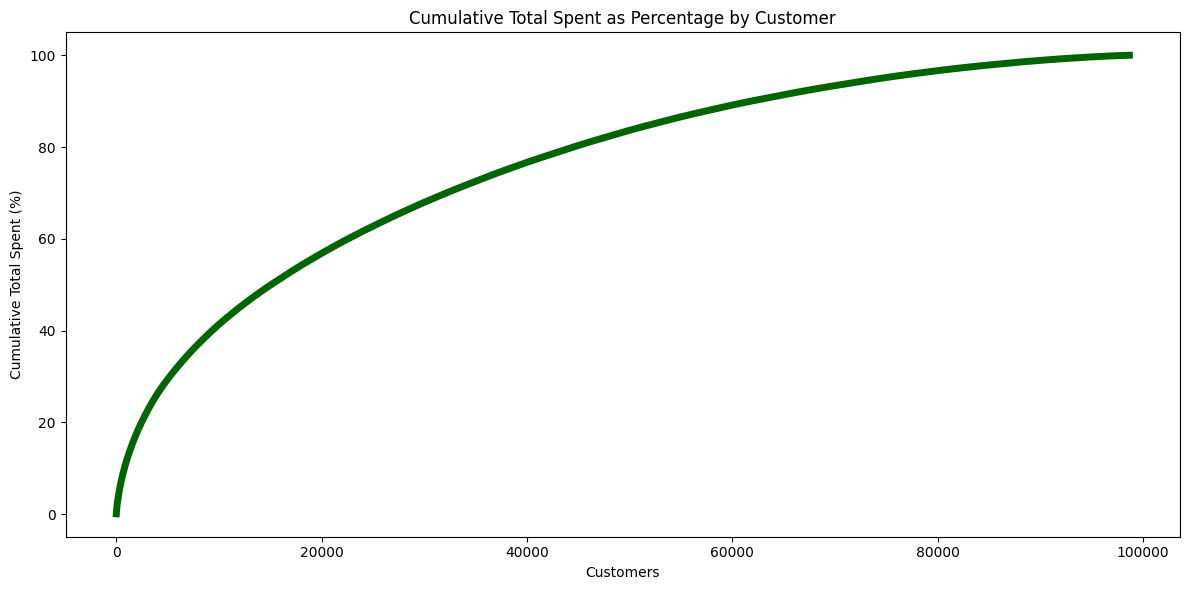

In [31]:
import matplotlib.pyplot as plt

customer_order = pd.read_csv('sql project pt 2/Average Order By Customer.csv')
customer_order.drop(columns=['customer_id', 'customer_unique_id'], inplace=True)
customer_order.index = range(1, len(customer_order) + 1)
overall_total_spent = customer_order['total_spent'].sum()
customer_order['percentage_total_spent'] = (customer_order['total_spent'] / overall_total_spent) * 100
customer_order['cumulative_percentage_spent'] = customer_order['percentage_total_spent'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(customer_order.index, customer_order['cumulative_percentage_spent'], color='darkgreen',lw=5)
plt.xlabel('Customers')
plt.ylabel('Cumulative Total Spent (%)')
plt.title('Cumulative Total Spent as Percentage by Customer')


plt.tight_layout()
plt.show()


In [22]:
customer_order

,total_orders,total_spent,avg_order_value,percentage_total_spent,cumulative_percentage_spent
1,8,13440.00,1680.00,0.098884,0.098884
2,4,7160.00,1790.00,0.052679,0.151564
3,1,6735.00,6735.00,0.049553,0.201116
4,1,6729.00,6729.00,0.049508,0.250625
5,1,6499.00,6499.00,0.047816,0.298441
...,...,...,...,...,...
98662,1,2.90,2.90,0.000021,99.999954
98663,1,2.29,2.29,0.000017,99.999971
98664,1,2.20,2.20,0.000016,99.999987
98665,1,0.85,0.85,0.000006,99.999994


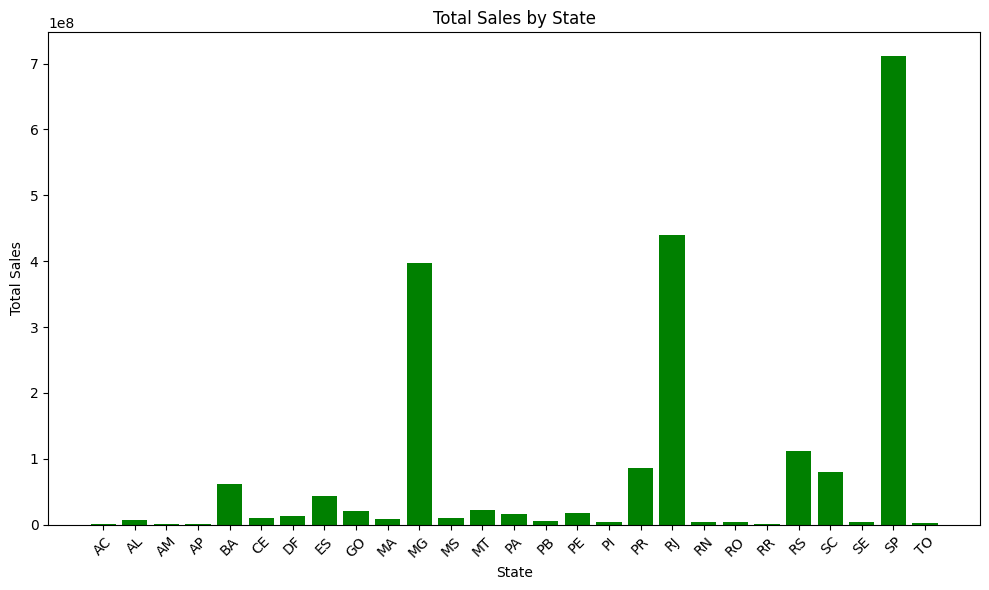

In [29]:
df=pd.read_csv('sql project pt 2/Geographical Sales.csv')
sales_by_state = df.groupby('state')['total_sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(sales_by_state['state'], sales_by_state['total_sales'], color='green')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Total Sales by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

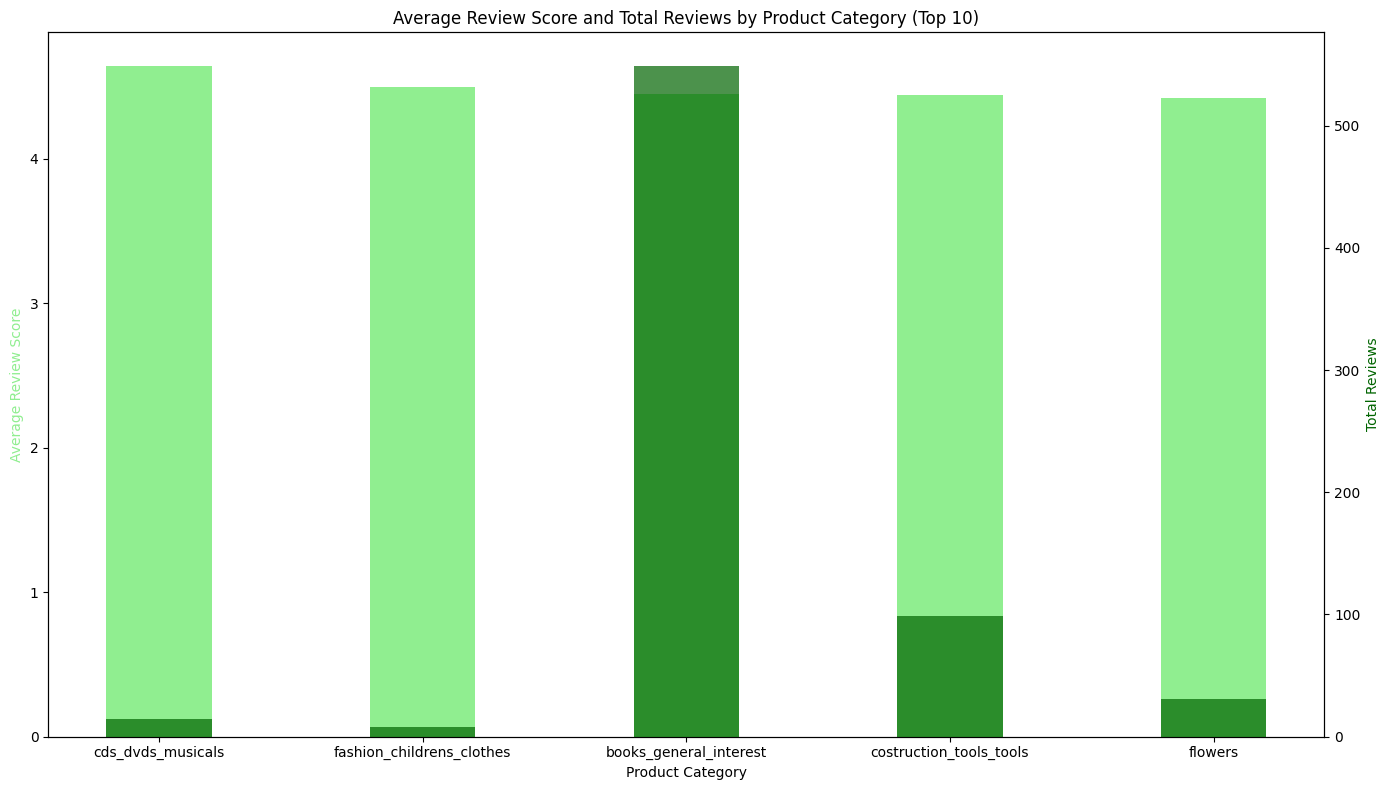

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('sql project pt 2/Order Review Analysis.csv')

top_categories = df.sort_values(by='avg_review_score', ascending=False).head(5)

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.bar(top_categories['category'], top_categories['avg_review_score'], width=0.4, label='Average Review Score', color='lightgreen')
ax1.set_ylabel('Average Review Score', color='lightgreen')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.bar(top_categories['category'], top_categories['total_reviews'], width=0.4, label='Total Reviews', color='darkgreen', alpha=0.7)
ax2.set_ylabel('Total Reviews', color='darkgreen')

# Additional labels and title
ax1.set_xlabel('Product Category', color='black')
ax1.set_title('Average Review Score and Total Reviews by Product Category (Top 10)', color='black')

# Rotate x-ticks for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust layout
fig.tight_layout()
plt.show()


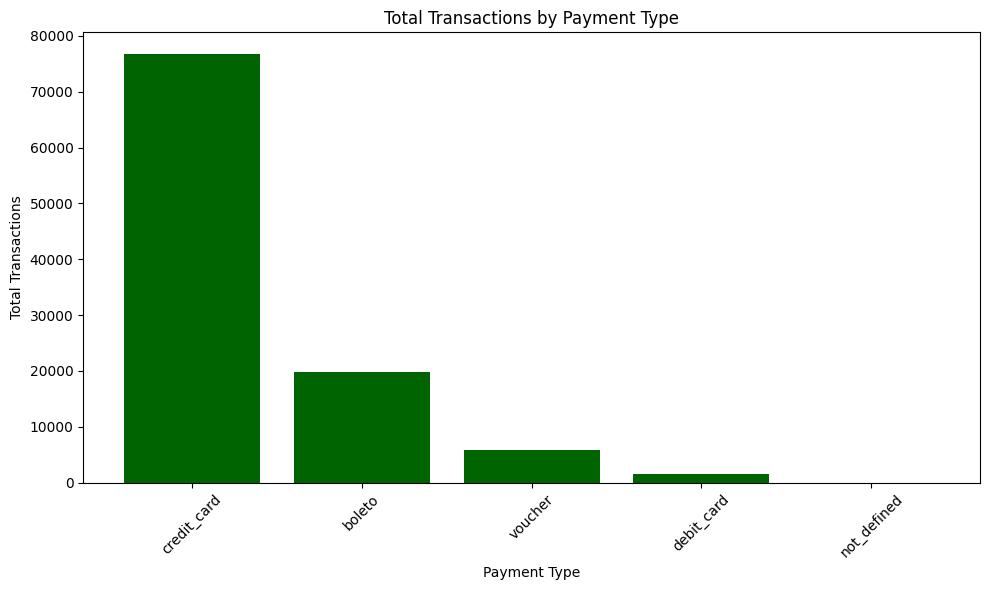

In [45]:
df=pd.read_csv('sql project pt 2/Payment Analysis.csv')
plt.figure(figsize=(10, 6))
plt.bar(df['payment_type'], df['total_transactions'], color='darkgreen')
plt.xlabel('Payment Type')
plt.ylabel('Total Transactions')
plt.title('Total Transactions by Payment Type')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [46]:
df=pd.read_csv('sql project pt 2/Seller Performance.csv')
df

,seller_id,seller_city,seller_state,total_products_sold,total_sales,avg_review_score
0,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,1148,228071.04,4.122822
1,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,408,220740.05,4.075980
2,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,1984,200561.42,3.803931
3,fa1c13f2614d7b5c4749cbc52fecda94,sumare,SP,582,192774.43,4.340206
4,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP,1367,188017.85,3.348208
...,...,...,...,...,...,...
3085,34aefe746cd81b7f3b23253ea28bef39,curitiba,PR,1,8.00,1.000000
3086,702835e4b785b67a084280efca355756,juiz de fora,MG,1,7.60,5.000000
3087,1fa2d3def6adfa70e58c276bb64fe5bb,sao paulo,SP,1,6.90,1.000000
3088,77128dec4bec4878c37ab7d6169d6f26,sao paulo,SP,1,6.50,5.000000


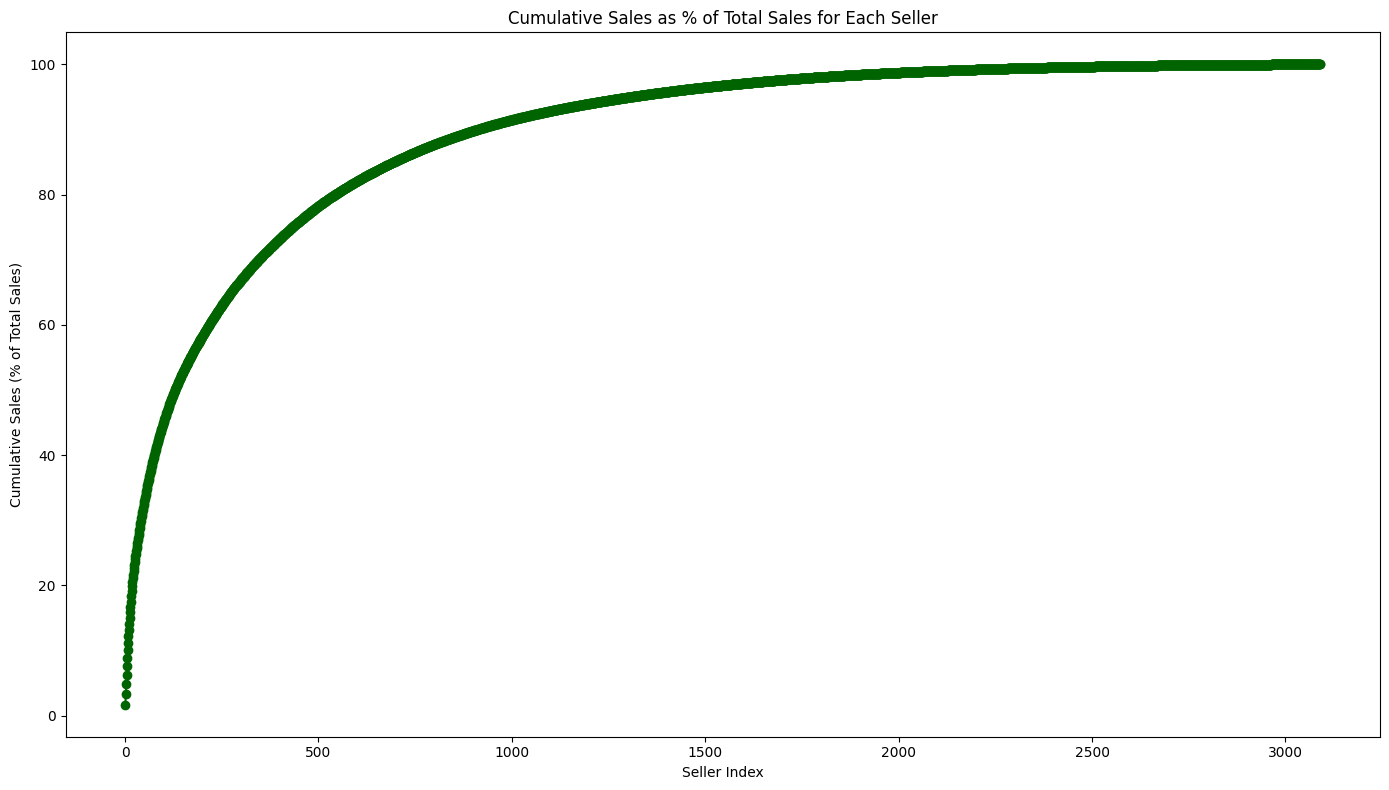

In [49]:
df.index = range(1, len(df) + 1)

df['cumulative_sales'] = df['total_sales'].cumsum()
total_sales_sum = df['total_sales'].sum()

df['cumulative_sales_pct'] = (df['cumulative_sales'] / total_sales_sum) * 100

plt.figure(figsize=(14, 8))
plt.plot(df.index, df['cumulative_sales_pct'], marker='o', color='darkgreen')

plt.xlabel('Seller Index', color='black')
plt.ylabel('Cumulative Sales (% of Total Sales)', color='black')
plt.title('Cumulative Sales as % of Total Sales for Each Seller', color='black')

plt.tight_layout()
plt.show()

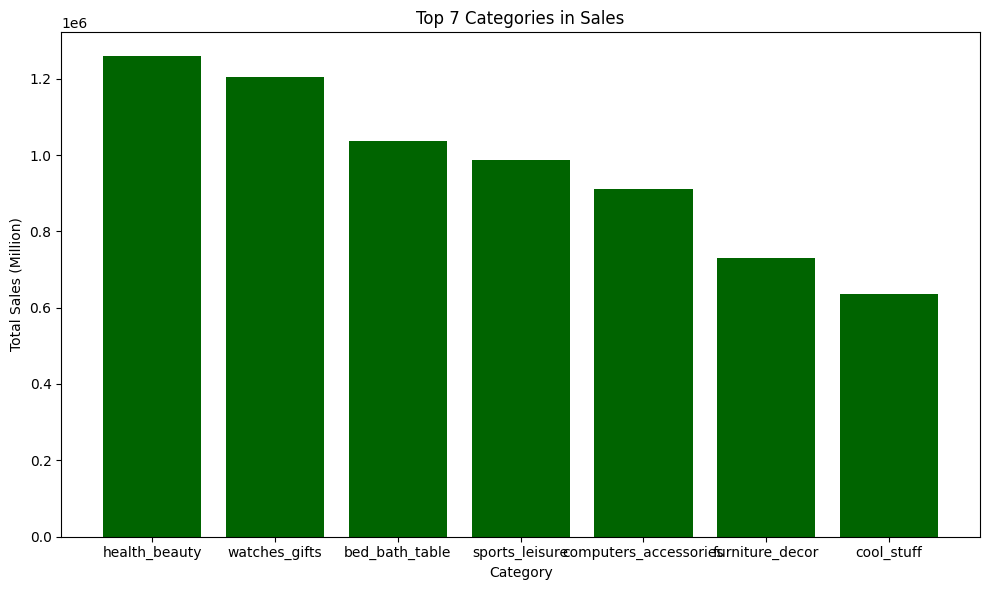

In [53]:
df=pd.read_csv('sql project pt 2/Total Sales by Product Category.csv')
top_categories = df.head(7)
plt.figure(figsize=(10, 6))
plt.bar(top_categories['category'], top_categories['total_sales'], color='darkgreen')
plt.xlabel('Category')
plt.ylabel('Total Sales (Million)')
plt.title('Top 7 Categories in Sales')
plt.tight_layout()
plt.show()

In [52]:
df

,category,total_sales,total_items_sold
0,health_beauty,1258681.34,9670
1,watches_gifts,1205005.68,5991
2,bed_bath_table,1036988.68,11115
3,sports_leisure,988048.97,8641
4,computers_accessories,911954.32,7827
...,...,...,...
66,flowers,1110.04,33
67,home_comfort_2,760.27,30
68,cds_dvds_musicals,730.00,14
69,fashion_childrens_clothes,569.85,8
